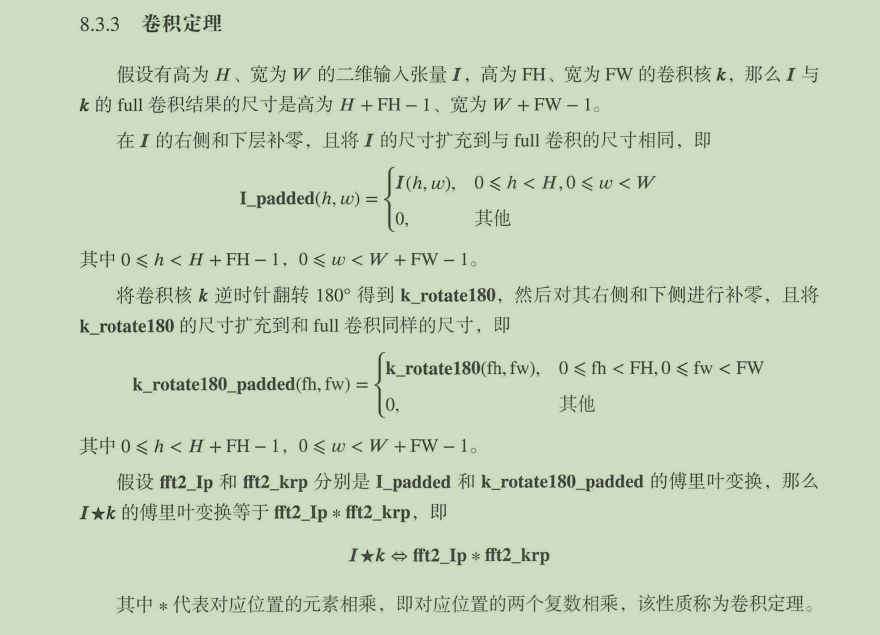

In [2]:
import tensorflow as tf
#输入张量I
I=tf.constant(
    [
        [2,3,8],
        [6,1,5],
        [7,2,-1]
    ]
,tf.complex64)

#卷积核
k=tf.constant(
    [
        [4,1],
        [2,3]
    ],tf.complex64)

#对输入张量的下侧和右侧补0
I_padded=tf.pad(I,[[0,1], [0,1]])
#翻转卷积核180度
k_rotate180=tf.reverse(k,[0,1])
#对翻转后的卷积核下侧和右侧补0
k_rotate180_padded=tf.pad(k_rotate180,[[0,2],[0,2]])
#二维离散傅立叶变换
I_padded_fft2=tf.fft2d(I_padded)
k_rotate180_padded_fft2=tf.fft2d(k_rotate180_padded)
# 两个二维傅立叶变换对应位置相乘
xk_fft2=tf.multiply(I_padded_fft2,k_rotate180_padded_fft2)
#对以上相乘的结果进行傅立叶逆变换
xk=tf.ifft2d(xk_fft2)
#创建会话
session=tf.Session()
#利用卷积定理计算的full卷积的结果
print(session.run(xk))

[[ 6.+0.j 13.+0.j 30.+0.j 16.+0.j]
 [20.+0.j 26.+0.j 37.+0.j 42.+0.j]
 [27.+0.j 45.+0.j 10.+0.j 18.+0.j]
 [ 7.+0.j 30.+0.j  7.+0.j -4.+0.j]]


# 打印的结果为两者full卷积的结果